- Orlando Cabrera #19943
- Diana Zaray Corado #191025
- Pablo Méndez #19195

# Laboratorio 5 - Análisis de Sentimientos

Utilice el dataset  Natural Language Processing with Disaster Tweets  de Kaggle.  Debe hacer un análisis exploratorio para entender mejor los datos, sabiendo que el objetivo final clasificar si un tweet se refiere a un desastre real no. Genere un informe en pdf con las explicaciones de los pasos que llevó a cabo y los resultados obtenidos. Recuerde que la investigación debe ser reproducible por lo que debe guardar el código que ha utilizado para resolver los ejercicios y/o cada uno de los pasos llevados a cabo si utiliza una herramienta visual. Incluya una nube de palabras que le ayude a detectar las que más se repiten. 

In [41]:
from textblob import TextBlob
import pandas as pd
import re
import nltk
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid", palette='Set2')
from collections import defaultdict
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Orlando\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Orlando\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [42]:
data = pd.read_csv("train.csv")
data

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


## Descripción de los datos
El conjunto de datos se llama Natural Language Processing with Disaster Tweets, el cual fue obtenido gracias a la página Kaggle. Posee un total de 7613 observaciones. Cuenta con 5 variables categóricas, las cuales son: 
- id 
- keyword
- location
- text
- target 

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


## Preprocesamiento

In [44]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


### Convertir el Texto a Minúsculas

In [45]:
data['text'] = data['text'].str.lower()
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


### Quitar URLs

In [46]:
expression = r"(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'\".,<>?«»“”‘’]))"

data['text'] = data['text'].apply(lambda s: re.sub(expression, "", s))
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


### Remover caracteres especiales

Se eliminarán todas las palabras que empiezan con '@', ya que hacen referencia a un usuario. Esto es para evitar que la red neuronal sea afectada por nombres de usuarios complejos, como *@wildifires_are_bad*.

In [47]:
expression = r"\B@\w*"
data['text'] = data['text'].apply(lambda s: re.sub(expression, "", s))
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this #earthquake m...,1
1,4,NaN,NaN,forest fire near la ronge sask. canada,1
2,5,NaN,NaN,all residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,just got sent this photo from ruby #alaska as ...,1


Para facilitar el aprendizaje del modelo, se removerán todos los caracteres que no son letras.

In [48]:
expression = "[^a-z ]"
data['text'] = data['text'].apply(lambda s: re.sub(expression, "", s))
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,our deeds are the reason of this earthquake ma...,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,all residents asked to shelter in place are be...,1
3,6,NaN,NaN,people receive wildfires evacuation orders in...,1
4,7,NaN,NaN,just got sent this photo from ruby alaska as s...,1


### Quitar las "stopwords"
Los *stopwords* son palabras que no proporcionan mucho significado a una frase desde el punto de vista de ML. La librería nltk proporciona una lista de stopwords en diferentes idiomas.

In [49]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(s):
    words = [word for word in s.split(" ") if not word in stopwords]
    return " ".join(words)

data['text'] = data['text'].apply(remove_stopwords)
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,residents asked shelter place notified officer...,1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1


## Unigramas y Bigramas

In [50]:
real_disaster = data[data.target == 1].text
fake_disaster = data[data.target == 0].text
real_disaster

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3        people receive wildfires evacuation orders ca...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609      control wild fires california even northern ...
7610                                utckm volcano hawaii 
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 3271, dtype: object

In [51]:
real_unigrams = real_disaster.apply(lambda s: TextBlob(s).ngrams(n=1))
fake_unigrams = fake_disaster.apply(lambda s: TextBlob(s).ngrams(n=1))
real_bigrams = real_disaster.apply(lambda s: TextBlob(s).ngrams(n=2))
fake_bigrams = fake_disaster.apply(lambda s: TextBlob(s).ngrams(n=2))
# Frecuencia de palabras en un desastre real
unireal = defaultdict(int)
unifake = defaultdict(int)
bireal = defaultdict(int)
bifake = defaultdict(int)
for gram in real_unigrams:
    for word in gram:
        unireal[word[0]] += 1
for gram in fake_unigrams:
    for word in gram:
        unifake[word[0]] += 1
for word in real_bigrams:
    for gram in word:
        bireal[' '.join(gram)] += 1
for word in fake_bigrams:
    for gram in word:
        bifake[' '.join(gram)] += 1
# visualizacion de frecuencias
df_unireal = pd.DataFrame([[key, unireal[key]] for key in unireal.keys()], columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
df_unifake = pd.DataFrame([[key, unifake[key]] for key in unifake.keys()], columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
df_bireal = pd.DataFrame([[key, bireal[key]] for key in bireal.keys()], columns=['Word', 'Count']).sort_values(by='Count', ascending=False)
df_bifake = pd.DataFrame([[key, bifake[key]] for key in bifake.keys()], columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

<AxesSubplot:xlabel='Count', ylabel='Word'>

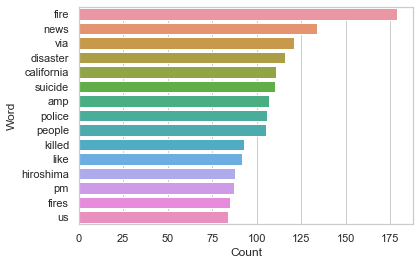

In [52]:
sns.barplot(y=df_unireal.Word.head(15), x=df_unireal.Count.head(15))

<AxesSubplot:xlabel='Count', ylabel='Word'>

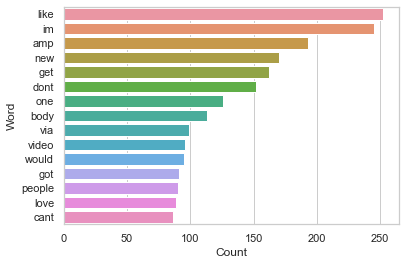

In [53]:
sns.barplot(y=df_unifake.Word.head(15), x=df_unifake.Count.head(15))

<AxesSubplot:xlabel='Count', ylabel='Word'>

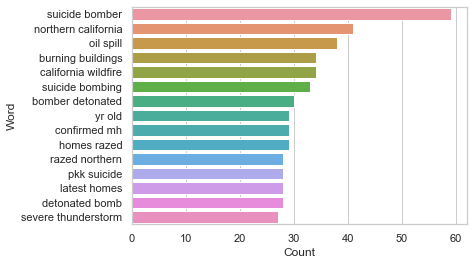

In [54]:
sns.barplot(y=df_bireal.Word.head(15), x=df_bireal.Count.head(15))

<AxesSubplot:xlabel='Count', ylabel='Word'>

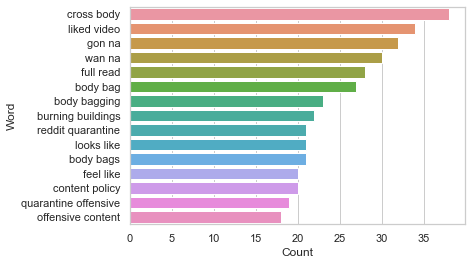

In [55]:
sns.barplot(y=df_bifake.Word.head(15), x=df_bifake.Count.head(15))

## Análisis exploratorio

### Investigar qué palabra se repite más en cada una de las categorías

In [56]:
df_unireal.head(3)

,Word,Count
8,fire,179
331,news,134
360,via,121


In [57]:
df_unifake.head(3)

,Word,Count
25,like,252
133,im,245
160,amp,193


### Hacer una nube de palabras para visualizar las que aparecen con más frecuencia

In [58]:
# Referencia https://stackoverflow.com/questions/16645799/how-to-create-a-word-cloud-from-a-corpus-in-python Autor: HeadAndTail

stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud.recolor(colormap= 'Blues' , random_state=17), alpha=0.98)
    plt.show()


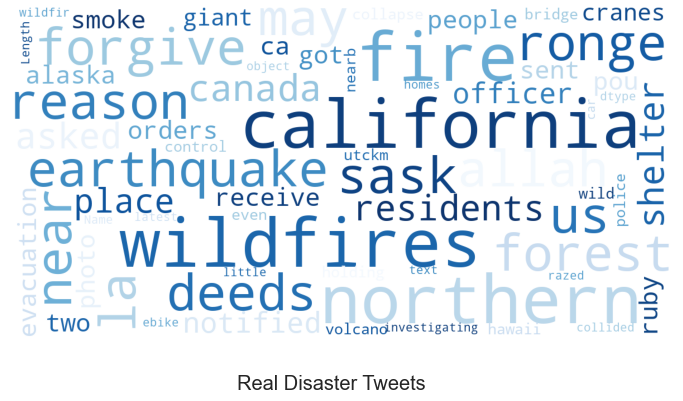

In [59]:
show_wordcloud(real_disaster, title = 'Real Disaster Tweets')

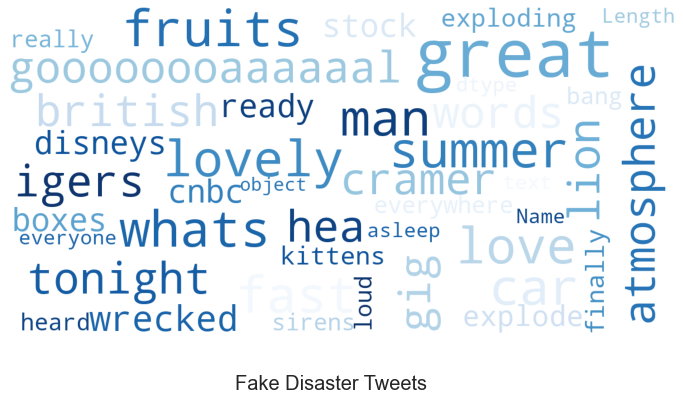

In [60]:
show_wordcloud(fake_disaster, title = 'Fake Disaster Tweets')

Como se puede observar en la nube de palabras para el caso de los tweets que tienen que ver con un desastre real, las palabras que más se repiten son: fire, california, earthquake, wildfires, etc. En el caso de la nube de palabras de los tweets que no tienen que ver con un desastre natural son: summer, lovely, hea, fruits, man, etc. Estas palabras se pueden observar de igual forma como las más frecuentes en las gráficas de frecuencia que se hicieron en el apartado anterior. 

### Hacer un histograma con las palabras que más se repiten 

<AxesSubplot:xlabel='Word'>

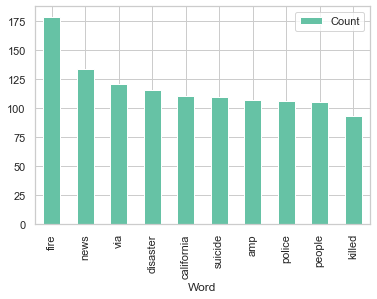

In [61]:
# Histograma con las palabras más frecuentes en un desastre real
df_unireal.head(10).plot.bar(x='Word', y='Count')

<AxesSubplot:xlabel='Word'>

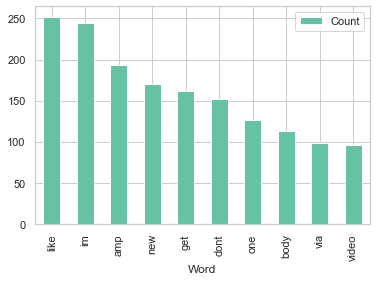

In [62]:
# Histograma con las palabras más frecuentes en un desastre real
df_unifake.head(10).plot.bar(x='Word', y='Count')

### Discutir sobre las palabras que tienen presencia en todas las categorías.

In [63]:
duplicates = df_unifake.assign(Isin=df_unifake.Word.isin(df_unireal.Word).astype(int))
duplicates.loc[duplicates['Isin'] == 1].Word

25          like
133           im
160          amp
48           new
97           get
          ...   
5096    photoset
5139       lakes
5135     daniels
5116        unto
5105    premiere
Name: Word, Length: 3780, dtype: object

Algo que vale la pena mencionar es que la palabra "like" es la que se encuentra más repetida en los dos grupos, siendo incluso esta palabra como la más frecuente en los tweets que no tiene nada que ver con desastres naturales y en el caso de los tweets que están relacionados a un desastre natural, esta se encuentra en el puesto 11. 

### Determinar las palabras positivas, negativas o neutras

In [64]:
# Todas las palabras en un solo dataframe
df_uni = pd.concat([df_unireal, df_unifake]).drop_duplicates(subset=['Word'], keep=False).reset_index(drop=True)
df_uni


,Word,Count
0,northern,64
1,legionnaires,62
2,debris,50
3,severe,47
4,migrants,41
...,...,...
11024,isai,1
11025,tangled,1
11026,mirkwood,1
11027,thranduil,1


In [65]:
df_uni['positivity'] = df_uni['Word'].apply(lambda s: TextBlob(s).sentiment.polarity)
df_uni

,Word,Count,positivity
0,northern,64,0.0
1,legionnaires,62,0.0
2,debris,50,0.0
3,severe,47,0.0
4,migrants,41,0.0
...,...,...,...
11024,isai,1,0.0
11025,tangled,1,0.0
11026,mirkwood,1,0.0
11027,thranduil,1,0.0


In [66]:
positivity = df_uni[df_uni.positivity > 0]
negative = df_uni[df_uni.positivity < 0]
neutral = df_uni[df_uni.positivity == 0]

In [67]:
positivity.sort_values(by='positivity', ascending=False).head(10)

,Word,Count,positivity
7224,wonderfully,1,1.0
8995,flawless,1,1.0
4576,impressed,4,1.0
7490,delicious,1,1.0
5611,perfectly,2,1.0
8022,exquisite,1,1.0
6335,magnificent,1,1.0
6344,superb,1,1.0
5517,impressive,2,1.0
4999,priceless,2,1.0


In [68]:
negative.sort_values(by='positivity', ascending=True).head(10)

,Word,Count,positivity
8055,boring,1,-1.000
268,horrific,4,-1.000
4574,nasty,4,-1.000
3381,horrifying,1,-0.900
7908,retard,1,-0.900
989,brutal,1,-0.875
4635,annoying,3,-0.800
4204,idiots,1,-0.800
5969,moron,1,-0.800
10818,rank,1,-0.800


In [69]:
neutral

,Word,Count,positivity
0,northern,64,0.0
1,legionnaires,62,0.0
2,debris,50,0.0
3,severe,47,0.0
4,migrants,41,0.0
...,...,...,...
11024,isai,1,0.0
11025,tangled,1,0.0
11026,mirkwood,1,0.0
11027,thranduil,1,0.0


## Algoritmo de Clasificación en Tweets
### Teniendo en cuenta la cantidad de palabras positivas y negativas del tweet determine qué tan positivo, negativo o neutral es el mismo.

In [70]:
data['positivity'] = data['text'].apply(lambda s: TextBlob(s).sentiment.polarity)
data.head()

,id,keyword,location,text,target,positivity
0,1,NaN,NaN,deeds reason earthquake may allah forgive us,1,0.0
1,4,NaN,NaN,forest fire near la ronge sask canada,1,0.1
2,5,NaN,NaN,residents asked shelter place notified officer...,1,-0.1
3,6,NaN,NaN,people receive wildfires evacuation orders ca...,1,0.0
4,7,NaN,NaN,got sent photo ruby alaska smoke wildfires pou...,1,0.0


### ¿Cuáles son los 10 tweets más negativos?¿En qué categoría están?

In [75]:
data[data.positivity < 0].sort_values(by='positivity', ascending=True).head(10)

,id,keyword,location,text,target,positivity
5799,8278,rioting,NaN,group mascara smeared girls rioting horrific ...,1,-1.0
1164,1676,bridge%20collapse,"New Delhi, Delhi",ashes australias collapse trent bridge among ...,1,-1.0
5392,7693,panic,NaN,panic attacks worst,0,-1.0
3717,5285,fear,"Thibodaux, LA",worst fear,0,-1.0
145,209,airplane%20accident,bangalore,horrible accident man died wings airplane wat...,1,-1.0
6244,8920,snowstorm,Deployed in the Middle East,besides nasty thunderstorm snowstorm nah cant...,0,-1.0
153,219,airplane%20accident,Mumbai india,horrible accident man died wings airplane,1,-1.0
154,220,airplane%20accident,sri lanka,horrible accident man died wings airplane,1,-1.0
4904,6980,massacre,NaN,iof murdered palestinian children gaza mas...,1,-1.0
162,235,airplane%20accident,India,omg horrible accident man died wings airplane,1,-1.0


In [84]:
print("Cantidad de tweets reales:",data[data.positivity < 0].sort_values(by='positivity', ascending=True).head(10)["target"].sum())

Cantidad de tweets reales:  7


Como se puede observar, de los 10 tweets más negativos, 7 de esos son tweets que están relacionados a un desastre real

### ¿Cuáles son los 10 tweets más positivos? ¿En qué categoría están?

In [76]:
data[data.positivity > 0].sort_values(by='positivity', ascending=False).head(10)

,id,keyword,location,text,target,positivity
2061,2955,dead,Sweden,even awesome norse landscapes loads atmospher...,0,1.0
7178,10287,weapon,//RP\ ot @Mort3mer\\,honey aint angel like scream words weapon well...,0,1.0
128,184,aftershock,304,remembering going die best way know avoid trap...,0,1.0
6291,8987,storm,Santiago de Chile,doves storm greatest denier electric proms pt,1,1.0
6137,8755,siren,The Web,best time day liveonstreamate,0,1.0
413,599,arsonist,Atlanta,nowplaying arsonist mc impressed,0,1.0
3530,5046,eyewitness,UK,rt patrickjbutler excellent damiengayle eyewit...,1,1.0
2349,3380,demolition,NaN,best grill u fkn pleb,0,1.0
5298,7568,outbreak,"Stockholm, Sweden",lets try best prevent another outbreak violen...,1,1.0
4697,6678,landslide,Edinburgh,keep ur head sand john best place lbr lan...,0,1.0


In [85]:
print("Cantidad de tweets reales:",data[data.positivity > 0].sort_values(by='positivity', ascending=False).head(10)["target"].sum())

Cantidad de tweets reales:  3


Como se puede observar, de los 3 tweets más positivos, 7 de esos son tweets que están relacionados a un desastre real

### ¿Son los tweets de la categoría que indica que habla de un desastre real más negativos que los de la otra categoría?
Como se comprobo, en el caso de los tweets más negativos, se tuvo una mayor cantidad de casos en donde el tweet sí hace referencia a un desastre real que en el caso de los tweets más positivos

### Cree una variable que contenga la “negatividad” de cada tweet. Inclúyala  en el conjunto de datos y entrene nuevamente el modelo de clasificación de la hoja pasada. ¿La inclusión de esta variable mejoró los resultados del modelo de clasificación?